In [1]:
# 제목             - P
# 글 작성 일자     - Q (예:20220504143118 : 2022년 5월 4일 14시 31분 18초)
# 게시물 ID        - R
# 질의 내용        - T
# 질의 요약        - AD
# 답변 내용        - AE
# 답변 요약        - AF
# 담당 부서        - AH

In [112]:
# Excel 읽어오기

import pandas as pd
file = pd.read_excel("./국민신문고(14_220515).xlsx", header=0, usecols="Q, R, T, AE, AH")

In [113]:
# 사고 예방 심사 2과만 추출 
# 실행 안하면 전체

file = file.loc[file['Column1.dep_name'] == '사고예방심사2과'] 
file = file.reset_index()
file = file.drop(columns='index')
file

,Column1.create_date,Column1.doc_id,Column1.content,Column1.prcs_cntn,Column1.dep_name
0,20220307170647,1AA-2203-0200863,안녕하세요.\n제목과 같이 유해화학물질 운반차량에 대한 설치검사를 받고자 하는데 문...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호: 1AA-2...,사고예방심사2과
1,20220310170014,1AA-2203-0293064,위험물(4류) 허가 창고입니다.[단순 보관업] \n\n이번 신규 물질로 4류 위험...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다음...,사고예방심사2과
2,20220312221753,1AA-2203-0362804,「사외배관 이송시설 설치 및 관리에 관한 고시」 3-가-1)과 세부기준 1)-1과 ...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호: 1AA-2...,사고예방심사2과
3,20220311113539,1AA-2203-0313674,안녕하십니까 화학물질관리법의 안전밸브 설치규정과 관련하여 문의드립니다. \n\n저희...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다...,사고예방심사2과
4,20220311153809,1AA-2203-0322203,환경부의 일반민원 유권해석 중 몇몇 답변은 상반되어 현장에서 혼란이 발생(환경부의 ...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호: 1AA-2...,사고예방심사2과
...,...,...,...,...,...
4280,20211215140053,1AA-2112-0479934,"안녕하세요, 화관법 설치기준 문의드립니다.\n\n""액체 유해화학물질 제조사용시설의 ...",1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호1AA-211...,사고예방심사2과
4281,20211210015948,1AA-2112-0299824,안녕하세요. 압력용기용 안전밸브와 관련하여 유해화학물질 취급시설 검사기준을 질의드리...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다음...,사고예방심사2과
4282,20211216110711,1AA-2112-0508202,안녕하십니까? 엔솔엔지니어링㈜ 공정팀의 장세환 차장입니다..\n\n저희는 현재 헥사...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다...,사고예방심사2과
4283,20211125154546,1AA-2111-0806294,"당사는 과산화수소 32%를 사용하는 타올및 실을 염색가공하는 업체이며, 화학물질관리...",민원인이 취하를 요청하여 취하처리하고 자체 종결 함,사고예방심사2과


## 엑셀 파일 내용 전처리

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### 1. 작성 일자 전처리 ( 날짜 형식 변경 )

In [3]:
#작성 일자 전처리

# 기존 형식 - 20220504143118 : 2022년 5월 4일 14시 31분 18초 
# 날짜만 추출 20220504143118 -> 2022-05-04


# 20220504143118 -> 20220504 로 변환 (INT)
for i in range(len(file)): 
    
        temp_create_date = file.loc[i,'Column1.create_date'] #작성 일자 추출
        if len(str(temp_create_date)) == 14 :
            temp_create_date = (round(temp_create_date/1000000))   #일까지만 살림
            file.loc[i,'Column1.create_date'] = temp_create_date


# 20220504 -> 2022-05-04 로 변환
file["Column1.create_date"] = file["Column1.create_date"].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
    
file["Column1.create_date"]


0      2022-03-07
1      2022-03-10
2      2022-03-12
3      2022-03-11
4      2022-03-11
          ...    
4280   2021-12-15
4281   2021-12-10
4282   2021-12-16
4283   2021-11-25
4284   2021-12-29
Name: Column1.create_date, Length: 4285, dtype: datetime64[ns]

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### 2. 게시물 ID 전처리 ( 내용 없음 )

In [4]:
# 게시물 ID 전처리 
# 전처리 내용 없음

file["Column1.doc_id"] = file["Column1.doc_id"] 

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### 정규화 처리 함수[같은 의미 단어 통합] - 공용 사용 가능 

In [5]:
# 정규화 처리 함수
# txt 파일 구분선 [---]
# 매개 변수 f -> .txt FILE
# 매개 변수 s -> string contents (str 형식)
import re

def normalization(f,s) :
    
    lines = f.readlines()
    for line in lines:
        line = line.strip()  # 줄 끝의 줄 바꿈 문자를 제거한다.
        
        if re.search('---',line) is not None :
            A = re.search('.*---',line).group().replace('---','') # 변경할 문자
            B = re.search('---.*',line).group().replace('---','') # 변경될 문자
            #print(A+' '+B)
            s = s.replace(A,B)
    return s


#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### 3. 질의 내용 전처리 ( 단어 정규화 )

In [6]:
# 질의 내용 전처리

file["Column1.content"]= file["Column1.content"].str.replace("\n","") # \n 개행문자 제거

#단어 정규화 - 같은 의미 단어 통합
for i in range(len(file)): 
    
    temp_content = file.loc[i,'Column1.content']

    f = open("./단어_정규화_목록.txt", 'r', encoding='UTF8')    
    content = normalization(f,temp_content)
    f.close()
    
    file.loc[i,'Column1.content'] = content
    

file["Column1.content"]

0       안녕하세요.제목과 같이 유해화학물질 운송차량에 대한 설치검사를 받고자 하는데 문의가...
1        위험물(4류) 허가 창고입니다.[단순 보관업] 이번 신규 물질로 4류 위험물 이면...
2       「사외배관 이송시설 설치 및 관리에 관한 고시」 3-가-1)과 세부기준 1)-1과 ...
3       안녕하십니까 화학물질관리법의 안전밸브 설치규정과 관련하여 문의드립니다. 저희 사업장...
4       환경부의 일반민원 유권해석 중 몇몇 답변은 상반되어 현장에서 혼란이 발생(환경부의 ...
                              ...                        
4280    안녕하세요, 화학물질관리법 설치기준 문의드립니다."액체 유해화학물질 제조사용시설의 ...
4281    안녕하세요. 압력용기용 안전밸브와 관련하여 유해화학물질 취급시설 검사기준을 질의드리...
4282    안녕하십니까? 엔솔엔지니어링㈜ 공정팀의 장세환 차장입니다..저희는 현재 헥사플루오로...
4283    당사는 과산화수소 32%를 사용하는 타올및 실을 염색가공하는 업체이며, 화학물질관리...
4284    유해화학물질 운송관련 문의(설치검사)차량운송업- 내용 -1. 산화니켈(유해화학물질)...
Name: Column1.content, Length: 4285, dtype: object

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### 4. 답변 내용 전처리 

#### 답변이 없는 경우  NUll -> 공백 처리 

In [7]:
file["Column1.prcs_cntn"] = file["Column1.prcs_cntn"].str.replace("\n","") # \n 제거 

for i in range(len(file)):
    if str(file.loc[i,'Column1.prcs_cntn']) is None : 
        file.loc[i,'Column1.prcs_cntn'] = ''

#### 담당자 추출

In [8]:
manager_df = pd.DataFrame(columns=['manager'])
c=0
for i in range(len(file)):
    flag = 0
    prcs_cntn_Text = str(file.loc[i,'Column1.prcs_cntn']) #답변 추출
    dep_Name = file.loc[i,'Column1.dep_name'] # 과 추출

# 담당자 추출
    prcs_cntn_Text = prcs_cntn_Text.replace('화학물질안전원 고시','화학물질안전원고시')
    prcs_cntn_Text = prcs_cntn_Text.replace('화학물질안전원 홈페이지','화학물질안전원홈페이지')
    m = re.search(dep_Name+'.*\)(로|에게)', prcs_cntn_Text)
    
    if m is None :
        m = re.search('(화학물질안전원 ).*\)(로|에게)', prcs_cntn_Text)
        
        if m is None :
            flag = 1

    
    
    if flag == 0 :            
        l = m.group().replace('(전화','(')
        if re.search('\([가-힣]',l) is not None :
            if re.search('\(담당:',l) is not None :
                n = l.replace('(담당:','').replace(', ','(')
            else :
                if re.search('.*[가-힣],',l) is not None :
                    n = re.search('.*[가-힣],',l).group().replace('(',' ').replace(',','(')
                else :
                    name=''
        else :
            n = l
           
        o = re.search('.*\(',n).group().replace('(','').replace('화학물질안전원 ','')

        if re.search('(주무관|공업연구사|연구사|연구관|사무관|서기관|전문의원|전문위원)',o) is not None :
            tw = re.search('(주무관|공업연구사|연구사|연구관|사무관|서기관|전문의원|전문위원)',o).group()
            name = (re.search('\s.*(주무관|공업연구사|연구사|연구관|사무관|서기관|전문의원|전문위원)',o).group().replace(' ','').replace(tw,' '+tw))
        
        else :
                name = ''

    else :
        name = ''

    
    if len(name) > 15 :
        if re.match('^.*(주무관|공업연구사|연구사|연구관|사무관|서기관|전문의원|전문위원)',name) is not None :
            if re.match('^.*(주무관|공업연구사|연구사|연구관|사무관|서기관|전문의원|전문위원)[0-9]',name)is not None :
                name = re.match('^.*(주무관|공업연구사|연구사|연구관|사무관|서기관|전문의원|전문위원)[0-9]',name).group().replace('0','') 
                
            else :
                name = ''
        else :
            name = ''
    
        
    if len(name) > 0 :
        c += 1
    
    manager_df = pd.concat([manager_df,pd.DataFrame({'manager':[name]})], ignore_index=True)

print(c)
#manager_df

3947


In [9]:
#기존 file 과 결합
file.loc[:,'manager'] = manager_df

file

,Column1.create_date,Column1.doc_id,Column1.content,Column1.prcs_cntn,Column1.dep_name,manager
0,2022-03-07,1AA-2203-0200863,안녕하세요.제목과 같이 유해화학물질 운송차량에 대한 설치검사를 받고자 하는데 문의가...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호: 1AA-2...,사고예방심사2과,이선민 주무관
1,2022-03-10,1AA-2203-0293064,위험물(4류) 허가 창고입니다.[단순 보관업] 이번 신규 물질로 4류 위험물 이면...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다음...,사고예방심사2과,정인희 연구사
2,2022-03-12,1AA-2203-0362804,「사외배관 이송시설 설치 및 관리에 관한 고시」 3-가-1)과 세부기준 1)-1과 ...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호: 1AA-2...,사고예방심사2과,이선민 주무관
3,2022-03-11,1AA-2203-0313674,안녕하십니까 화학물질관리법의 안전밸브 설치규정과 관련하여 문의드립니다. 저희 사업장...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다...,사고예방심사2과,정인희 연구사
4,2022-03-11,1AA-2203-0322203,환경부의 일반민원 유권해석 중 몇몇 답변은 상반되어 현장에서 혼란이 발생(환경부의 ...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호: 1AA-2...,사고예방심사2과,이선민 주무관
...,...,...,...,...,...,...
4280,2021-12-15,1AA-2112-0479934,"안녕하세요, 화학물질관리법 설치기준 문의드립니다.""액체 유해화학물질 제조사용시설의 ...",1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호1AA-211...,사고예방심사2과,신은수 연구사
4281,2021-12-10,1AA-2112-0299824,안녕하세요. 압력용기용 안전밸브와 관련하여 유해화학물질 취급시설 검사기준을 질의드리...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다음...,사고예방심사2과,곽솔림 연구사
4282,2021-12-16,1AA-2112-0508202,안녕하십니까? 엔솔엔지니어링㈜ 공정팀의 장세환 차장입니다..저희는 현재 헥사플루오로...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다...,사고예방심사2과,정재형 주무관
4283,2021-11-25,1AA-2111-0806294,"당사는 과산화수소 32%를 사용하는 타올및 실을 염색가공하는 업체이며, 화학물질관리...",민원인이 취하를 요청하여 취하처리하고 자체 종결 함,사고예방심사2과,


#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### 5. 담당 부서 전처리 ( 내용 없음 )

In [10]:
# 게시물 ID 전처리 
# 전처리 내용 없음

file["Column1.dep_name"] = file["Column1.dep_name"] 

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [101]:
gosi_df = pd.DataFrame(columns=['gosi'])
for i in range(len(file)):
    content_Text = file.loc[i,"Column1.content"] #질문 추출
    prcs_cntn_Text = str(file.loc[i,'Column1.prcs_cntn']) #답변 추출
        
    prcs_cntn_Text = prcs_cntn_Text +' '+content_Text
        
    gosi_list = []
    
    #고시 추출
    f = open("./취급시설_고시_목록.txt", 'r', encoding='UTF8')    
    lines = f.readlines()
    gosi_str = ''
    for line in lines:
        
        flag = 0
        
        line = line.strip()  # 줄 끝의 줄 바꿈 문자를 제거한다.
        
        if re.search('---',line) is not None :
            gosis = line.split('---')
    #        print(gosis)
#            temp_df = pd.DataFrame(columns=[gosis[0]])

            if any(gosi in prcs_cntn_Text for gosi in gosis) :
                flag = 1
            #
        
        
        if flag == 1 :
            gosi_list.append(gosis[0])
            #print(gosis[0])

    #len(gosi_list)
    gosi_str = ', '.join(gosi_list)
    gosi_df = pd.concat([gosi_df,pd.DataFrame({'gosi':[gosi_str]})], ignore_index=True)

gosi_df

,gosi
0,안전원고시 제2019-11호 고시
1,안전원고시 제2020-7호 고시
2,안전원고시 제2020-12호 고시
3,
4,"안전원고시 제2020-6호 고시, 안전원고시 제2020-8호 고시, 안전원고시 제2..."
...,...
4280,"안전원고시 제2020-6호 고시, 안전원고시 제2020-5호 고시"
4281,"안전원고시 제2020-6호 고시, 안전원고시 제2020-5호 고시"
4282,"안전원고시 제2020-6호 고시, 안전원고시 제2020-5호 고시"
4283,"안전원고시 제2020-6호 고시, 안전원고시 제2020-5호 고시"


In [102]:
#기존 file 과 결합
file.loc[:,'gosi'] = gosi_df


In [103]:
substance_df = pd.DataFrame(columns=['substance'])
for i in range(len(file)):
    content_Text = file.loc[i,"Column1.content"] #질문 추출
    prcs_cntn_Text = str(file.loc[i,'Column1.prcs_cntn']) #답변 추출
        
    prcs_cntn_Text = prcs_cntn_Text +' '+content_Text
        
    substance_list = []
    
    #고시 추출
    f = open("./화학물질_목록.txt", 'r', encoding='UTF8')    
    lines = f.readlines()
    
    for line in lines:
        
        flag = 0
        
        line = line.strip()  # 줄 끝의 줄 바꿈 문자를 제거한다.

        if line in prcs_cntn_Text :
            substance_list.append(line)
            
        
    
        substance_str = ', '.join(substance_list)
    
    substance_df = pd.concat([substance_df,pd.DataFrame({'substance':[substance_str]})], ignore_index=True)
        
        
substance_df

,substance
0,니코틴
1,"독물, 유독물질"
2,
3,
4,"인화성물질, 혼합물"
...,...
4280,
4281,냉각수
4282,"가연성물질, 독물, 부타디엔, 유독물질"
4283,"과산화수소, 배수, 산화수, 폐수"


In [104]:
#기존 file 과 결합
file.loc[:,'substance'] = substance_df


In [105]:
facility_df = pd.DataFrame(columns=['facility'])
for i in range(len(file)):
    content_Text = file.loc[i,"Column1.content"] #질문 추출
    prcs_cntn_Text = str(file.loc[i,'Column1.prcs_cntn']) #답변 추출
        
    prcs_cntn_Text = prcs_cntn_Text +' '+content_Text
        
    
    facility_list = []
    
    #고시 추출
    f = open("./취급시설_목록.txt", 'r', encoding='UTF8')    
    lines = f.readlines()
    facility_str = ''
    for line in lines:
        
        flag = 0
        
        line = line.strip()  # 줄 끝의 줄 바꿈 문자를 제거한다.

        if line in prcs_cntn_Text :
            facility_list.append(line)
            
        facility_str = ', '.join(facility_list)
    
    facility_df = pd.concat([facility_df,pd.DataFrame({'facility':[facility_str]})], ignore_index=True)

facility_df   

,facility
0,"승용자동차, 승합자동차, 운반차량, 운송차량, 차량, 화물자동차"
1,"방지턱, 창고, 트렌치"
2,"도로, 방류벽, 배관, 밸브, 사외배관, 수도, 저장탱크, 탱크, 하천"
3,"배관, 밸브"
4,"감지기, 배관, 배출덕트, 밸브, 송풍기, 수도, 스크러버, 용기, 후드"
...,...
4280,"방지턱, 벽체, 지하, 집수시설, 트렌치"
4281,"밸브, 용기, 지하"
4282,"도로, 외벽, 용기"
4283,"수도, 탱크, 탱크로리"


In [106]:
#기존 file 과 결합
file.loc[:,'facility'] = facility_df


In [108]:
file.to_excel('./게시글_정리.xlsx')
file


,Column1.create_date,Column1.doc_id,Column1.content,Column1.prcs_cntn,Column1.dep_name,manager,gosi,substance,facility
0,2022-03-07,1AA-2203-0200863,안녕하세요.제목과 같이 유해화학물질 운송차량에 대한 설치검사를 받고자 하는데 문의가...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호: 1AA-2...,사고예방심사2과,이선민 주무관,안전원고시 제2019-11호 고시,니코틴,"승용자동차, 승합자동차, 운반차량, 운송차량, 차량, 화물자동차"
1,2022-03-10,1AA-2203-0293064,위험물(4류) 허가 창고입니다.[단순 보관업] 이번 신규 물질로 4류 위험물 이면...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다음...,사고예방심사2과,정인희 연구사,안전원고시 제2020-7호 고시,"독물, 유독물질","방지턱, 창고, 트렌치"
2,2022-03-12,1AA-2203-0362804,「사외배관 이송시설 설치 및 관리에 관한 고시」 3-가-1)과 세부기준 1)-1과 ...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호: 1AA-2...,사고예방심사2과,이선민 주무관,안전원고시 제2020-12호 고시,,"도로, 방류벽, 배관, 밸브, 사외배관, 수도, 저장탱크, 탱크, 하천"
3,2022-03-11,1AA-2203-0313674,안녕하십니까 화학물질관리법의 안전밸브 설치규정과 관련하여 문의드립니다. 저희 사업장...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다...,사고예방심사2과,정인희 연구사,,,"배관, 밸브"
4,2022-03-11,1AA-2203-0322203,환경부의 일반민원 유권해석 중 몇몇 답변은 상반되어 현장에서 혼란이 발생(환경부의 ...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호: 1AA-2...,사고예방심사2과,이선민 주무관,"안전원고시 제2020-6호 고시, 안전원고시 제2020-8호 고시, 안전원고시 제2...","인화성물질, 혼합물","감지기, 배관, 배출덕트, 밸브, 송풍기, 수도, 스크러버, 용기, 후드"
...,...,...,...,...,...,...,...,...,...
4280,2021-12-15,1AA-2112-0479934,"안녕하세요, 화학물질관리법 설치기준 문의드립니다.""액체 유해화학물질 제조사용시설의 ...",1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원(신청번호1AA-211...,사고예방심사2과,신은수 연구사,"안전원고시 제2020-6호 고시, 안전원고시 제2020-5호 고시",,"방지턱, 벽체, 지하, 집수시설, 트렌치"
4281,2021-12-10,1AA-2112-0299824,안녕하세요. 압력용기용 안전밸브와 관련하여 유해화학물질 취급시설 검사기준을 질의드리...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다음...,사고예방심사2과,곽솔림 연구사,"안전원고시 제2020-6호 고시, 안전원고시 제2020-5호 고시",냉각수,"밸브, 용기, 지하"
4282,2021-12-16,1AA-2112-0508202,안녕하십니까? 엔솔엔지니어링㈜ 공정팀의 장세환 차장입니다..저희는 현재 헥사플루오로...,1. 안녕하십니까? 귀하께서 국민신문고를 통해 신청하신 민원에대한 검토 결과를 다...,사고예방심사2과,정재형 주무관,"안전원고시 제2020-6호 고시, 안전원고시 제2020-5호 고시","가연성물질, 독물, 부타디엔, 유독물질","도로, 외벽, 용기"
4283,2021-11-25,1AA-2111-0806294,"당사는 과산화수소 32%를 사용하는 타올및 실을 염색가공하는 업체이며, 화학물질관리...",민원인이 취하를 요청하여 취하처리하고 자체 종결 함,사고예방심사2과,,"안전원고시 제2020-6호 고시, 안전원고시 제2020-5호 고시","과산화수소, 배수, 산화수, 폐수","수도, 탱크, 탱크로리"


## 고시별 날짜 

'456123'

In [11]:
gosi_df= pd.DataFrame(file["Column1.create_date"])

f = open("./취급시설_고시_목록.txt", 'r', encoding='UTF8')    
lines = f.readlines()

for line in lines:
    
    line = line.strip()  # 줄 끝의 줄 바꿈 문자를 제거한다.
    
    if re.search('---',line) is not None :
        gosis = line.split('---')

        temp_df = pd.DataFrame(columns=[gosis[0]])


        for i in range(len(file)):

            content_Text = file.loc[i,"Column1.content"] #질문 추출
            prcs_cntn_Text = str(file.loc[i,'Column1.prcs_cntn']) #답변 추출
        
            prcs_cntn_Text = prcs_cntn_Text +' '+content_Text
        
            flag = 0


            if any(gosi in prcs_cntn_Text for gosi in gosis) :
                 flag = 1



            temp_df = pd.concat([temp_df,pd.DataFrame({gosis[0]:[flag]})], ignore_index=True)



        gosi_df.loc[:,gosis[0]] = temp_df
    
gosi_df

,Column1.create_date,안전원고시 제2020-7호,안전원고시 제2020-6호,안전원고시 제2020-9호,안전원고시 제2020-8호,안전원고시 제2020-5호,안전원고시 제2020-10호,안전원고시 제2019-11호,안전원고시 제2020-11호,안전원고시 제2020-12호,안전원고시 제2021-2호,안전원고시 제2021-3호,안전원고시 제2022-2호,안전원고시 제2021-5호,안전원고시 제2021-1호,안전원고시 제2021-7호,안전원고시 제2021-8호,안전원고시 제2021-9호
0,2022-03-07,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2022-03-10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2022-03-12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2022-03-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2022-03-11,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280,2021-12-15,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4281,2021-12-10,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4282,2021-12-16,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4283,2021-11-25,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# 고시 추출된 횟수

temp_df1 = gosi_df.copy()
temp_df1 = temp_df1.drop('Column1.create_date', axis=1)
temp_df1["RowSum"] = temp_df1.sum(axis=1) 
temp_df1['RowSum'].sum()
temp_df1[temp_df1['RowSum']!=0].count()
#3446

KeyError: "['Column1.create_date'] not found in axis"

In [109]:
# 고시별 게시물 수

temp_df2 = gosi_df.copy()
temp_df2 = temp_df2.drop('Column1.create_date', axis=1)
temp_df2.sum()

#temp_df1["RowSum"] = temp_df.sum(axis=1) 
#temp_df1['RowSum'].sum()

KeyError: "['Column1.create_date'] not found in axis"

,gosi
0,안전원고시 제2019-11호 고시
1,안전원고시 제2020-7호 고시
2,안전원고시 제2020-12호 고시
3,
4,"안전원고시 제2020-6호 고시, 안전원고시 제2020-8호 고시, 안전원고시 제2..."
...,...
4280,"안전원고시 제2020-6호 고시, 안전원고시 제2020-5호 고시"
4281,"안전원고시 제2020-6호 고시, 안전원고시 제2020-5호 고시"
4282,"안전원고시 제2020-6호 고시, 안전원고시 제2020-5호 고시"
4283,"안전원고시 제2020-6호 고시, 안전원고시 제2020-5호 고시"


In [14]:
# 같은 날짜 합구하기
all_gosi=gosi_df.groupby('Column1.create_date').sum()   
all_gosi["RowSum"] = all_gosi.sum(axis=1) # 결측 날짜 제거를 위해 합 구하기
all_gosi
#print(all_gosi.index)

,안전원고시 제2020-7호,안전원고시 제2020-6호,안전원고시 제2020-9호,안전원고시 제2020-8호,안전원고시 제2020-5호,안전원고시 제2020-10호,안전원고시 제2019-11호,안전원고시 제2020-11호,안전원고시 제2020-12호,안전원고시 제2021-2호,안전원고시 제2021-3호,안전원고시 제2022-2호,안전원고시 제2021-5호,안전원고시 제2021-1호,안전원고시 제2021-7호,안전원고시 제2021-8호,안전원고시 제2021-9호,RowSum
Column1.create_date,,,,,,,,,,,,,,,,,,
2017-04-05,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2
2017-04-06,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,4
2017-04-07,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
2017-04-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-04-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-09,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2022-05-10,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,4
2022-05-11,0,2,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,5


In [21]:
many_gosi = all_gosi[all_gosi['RowSum']>1]

many_gosi.to_excel('./날짜별 2개 이상인 고시.xlsx')
many_gosi

,안전원고시 제2020-7호,안전원고시 제2020-6호,안전원고시 제2020-9호,안전원고시 제2020-8호,안전원고시 제2020-5호,안전원고시 제2020-10호,안전원고시 제2019-11호,안전원고시 제2020-11호,안전원고시 제2020-12호,안전원고시 제2021-2호,안전원고시 제2021-3호,안전원고시 제2022-2호,안전원고시 제2021-5호,안전원고시 제2021-1호,안전원고시 제2021-7호,안전원고시 제2021-8호,안전원고시 제2021-9호,RowSum
Column1.create_date,,,,,,,,,,,,,,,,,,
2017-04-05,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2
2017-04-06,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,4
2017-04-07,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
2017-04-13,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2
2017-04-17,1,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-03,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2022-05-04,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2022-05-06,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,3


In [22]:
all_gosi = all_gosi[all_gosi['RowSum']!=0] # 0이 아닌 행만 가져오기
del all_gosi['RowSum'] # RowSum 다시 삭제
all_gosi

,안전원고시 제2020-7호,안전원고시 제2020-6호,안전원고시 제2020-9호,안전원고시 제2020-8호,안전원고시 제2020-5호,안전원고시 제2020-10호,안전원고시 제2019-11호,안전원고시 제2020-11호,안전원고시 제2020-12호,안전원고시 제2021-2호,안전원고시 제2021-3호,안전원고시 제2022-2호,안전원고시 제2021-5호,안전원고시 제2021-1호,안전원고시 제2021-7호,안전원고시 제2021-8호,안전원고시 제2021-9호
Column1.create_date,,,,,,,,,,,,,,,,,
2017-04-05,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2017-04-06,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
2017-04-07,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2017-04-12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-04-13,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-06,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2022-05-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2022-05-09,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
#날짜 별 간격 안 띄우게
day_gosi = all_gosi.copy()

try :
    day_gosi.index=day_gosi.index.strftime('%m/%d/%Y')

except:
    ;
    
print(day_gosi.index)
print(all_gosi.index)
#all_gosi.columns

Index(['04/05/2017', '04/06/2017', '04/07/2017', '04/12/2017', '04/13/2017',
       '04/17/2017', '04/18/2017', '04/20/2017', '04/21/2017', '04/25/2017',
       ...
       '04/27/2022', '04/28/2022', '04/29/2022', '05/03/2022', '05/04/2022',
       '05/06/2022', '05/07/2022', '05/09/2022', '05/10/2022', '05/11/2022'],
      dtype='object', name='Column1.create_date', length=1114)
DatetimeIndex(['2017-04-05', '2017-04-06', '2017-04-07', '2017-04-12',
               '2017-04-13', '2017-04-17', '2017-04-18', '2017-04-20',
               '2017-04-21', '2017-04-25',
               ...
               '2022-04-27', '2022-04-28', '2022-04-29', '2022-05-03',
               '2022-05-04', '2022-05-06', '2022-05-07', '2022-05-09',
               '2022-05-10', '2022-05-11'],
              dtype='datetime64[ns]', name='Column1.create_date', length=1114, freq=None)


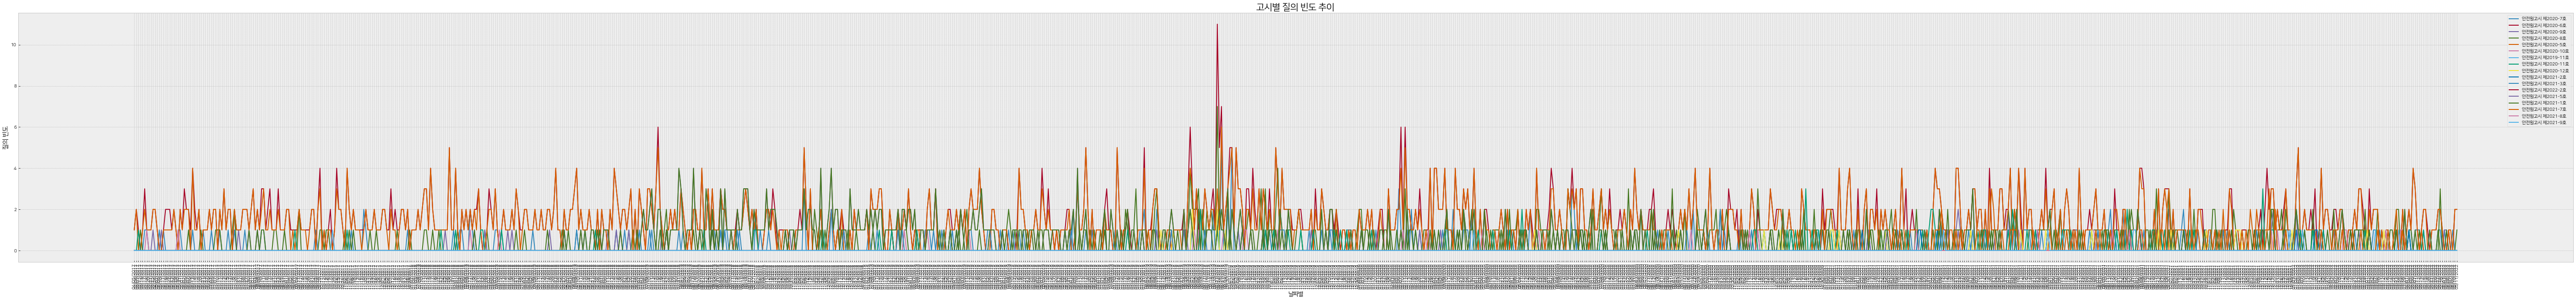

In [24]:
# 시각화 하기

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #한글 설정


font_location = 'C:/WINDOWS/Fonts/NanumSquare.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False    


gosi_name = day_gosi.columns
gosi_name

plt.style.use('bmh')

plt.figure(figsize=(100,10))
for gosi in gosi_name:
    plt.plot(day_gosi.index, day_gosi[gosi], label=gosi)
    # 범례 표시
    plt.legend()
    # 제목
    plt.title('고시별 질의 빈도 추이', fontsize=20)
    # x축 이름
    plt.xlabel('날짜별', fontsize=13)
    # y축 이름
    plt.ylabel('질의 빈도', fontsize=14)
    # x축 설정(rotation은 각도)
    plt.xticks(day_gosi.index, rotation=90)



In [25]:
# 시간 간격 재조정 - 리샘플링

month_gosi = all_gosi.resample(rule='M').sum()
print(month_gosi.index)

#month_gosi

DatetimeIndex(['2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30',
               '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31',
               '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
               '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
               '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
      

In [26]:
#날짜 별 간격 안 띄우게

try :
    month_gosi.index=month_gosi.index.strftime('%m/%d/%Y')

except:
    ;
    

#all_gosi.columns

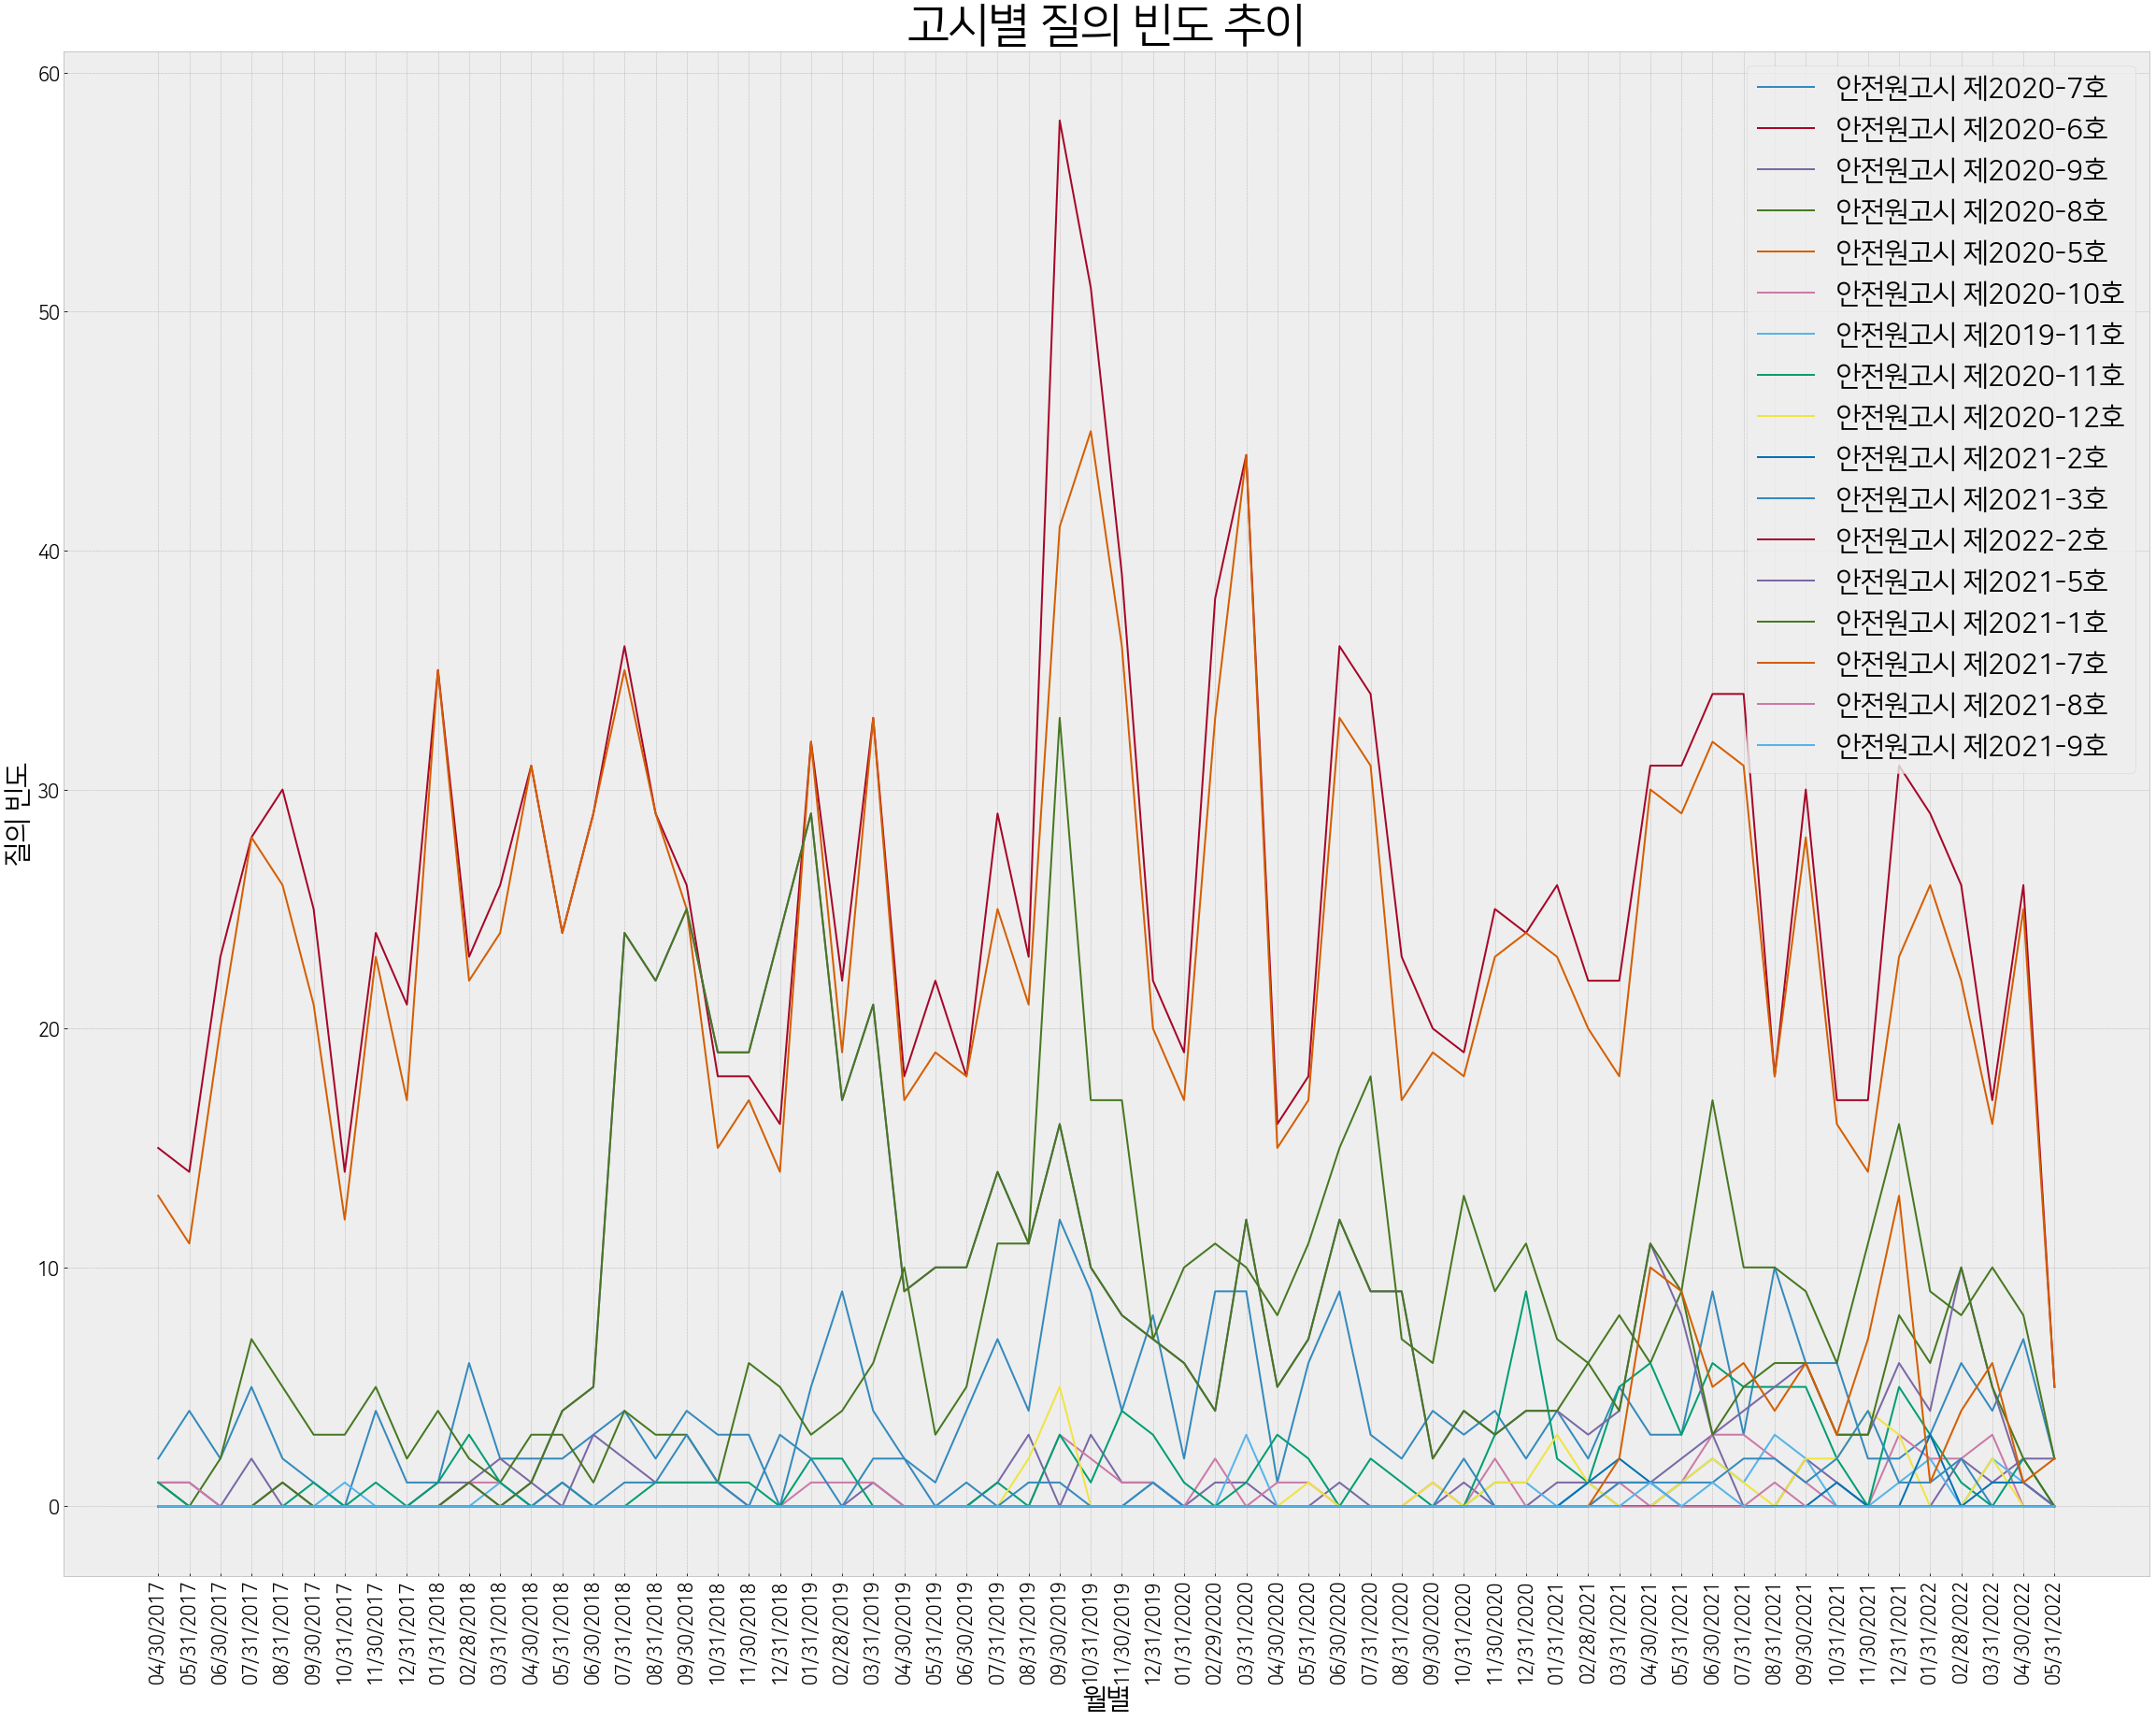

In [28]:
# 시각화 하기

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #한글 설정


font_location = 'C:/WINDOWS/Fonts/NanumSquare.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

plt.rc('legend',fontsize=30)
#plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rcParams['axes.unicode_minus'] = False    


gosi_name = month_gosi.columns
gosi_name

plt.style.use('bmh')

plt.figure(figsize=(40,30),facecolor='white')
for gosi in gosi_name:
    plt.plot(month_gosi.index, month_gosi[gosi], label=gosi)
    # 범례 표시
    plt.legend()
    # 제목
    plt.title('고시별 질의 빈도 추이', fontsize=50)
    # x축 이름
    plt.xlabel('월별', fontsize=30)
    # y축 이름
    plt.ylabel('질의 빈도', fontsize=30)
    # x축 설정(rotation은 각도)
    plt.xticks(month_gosi.index, rotation=90,fontsize=20)
    
    plt.yticks(fontsize=20)



### 고시별 담당자

In [29]:
#담당자
gosi_df= pd.DataFrame(file["manager"])

f = open("./취급시설_고시_목록.txt", 'r', encoding='UTF8')    
lines = f.readlines()

for line in lines:
    
    line = line.strip()  # 줄 끝의 줄 바꿈 문자를 제거한다.
    
    if re.search('---',line) is not None :
        gosis = line.split('---')

        temp_df = pd.DataFrame(columns=[gosis[0]])


        for i in range(len(file)):

            content_Text = file.loc[i,"Column1.content"] #질문 추출
            prcs_cntn_Text = str(file.loc[i,'Column1.prcs_cntn']) #답변 추출
        
            prcs_cntn_Text = prcs_cntn_Text +' '+content_Text

            flag = 0


            if any(gosi in prcs_cntn_Text for gosi in gosis) :
                 flag = 1



            temp_df = pd.concat([temp_df,pd.DataFrame({gosis[0]:[flag]})], ignore_index=True)



        gosi_df.loc[:,gosis[0]] = temp_df
    
gosi_df

,manager,안전원고시 제2020-7호,안전원고시 제2020-6호,안전원고시 제2020-9호,안전원고시 제2020-8호,안전원고시 제2020-5호,안전원고시 제2020-10호,안전원고시 제2019-11호,안전원고시 제2020-11호,안전원고시 제2020-12호,안전원고시 제2021-2호,안전원고시 제2021-3호,안전원고시 제2022-2호,안전원고시 제2021-5호,안전원고시 제2021-1호,안전원고시 제2021-7호,안전원고시 제2021-8호,안전원고시 제2021-9호
0,이선민 주무관,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,정인희 연구사,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,이선민 주무관,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,정인희 연구사,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,이선민 주무관,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280,신은수 연구사,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4281,곽솔림 연구사,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4282,정재형 주무관,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4283,,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# 같은 담당자 합구하기
all_manager_gosi=gosi_df.groupby('manager').sum()
all_manager_gosi.rename(index={'':'기타(추출 안된 담당자)'},inplace=True)
#all_manager_gosi["RowSum"] = all_manager_gosi.sum(axis=1) # 결측 날짜 제거를 위해 합 구하기
all_manager_gosi.to_csv('./담당자 별 고시.csv', encoding = "utf-8-sig")

all_manager_gosi


#print(all_gosi.index)

,안전원고시 제2020-7호,안전원고시 제2020-6호,안전원고시 제2020-9호,안전원고시 제2020-8호,안전원고시 제2020-5호,안전원고시 제2020-10호,안전원고시 제2019-11호,안전원고시 제2020-11호,안전원고시 제2020-12호,안전원고시 제2021-2호,안전원고시 제2021-3호,안전원고시 제2022-2호,안전원고시 제2021-5호,안전원고시 제2021-1호,안전원고시 제2021-7호,안전원고시 제2021-8호,안전원고시 제2021-9호
manager,,,,,,,,,,,,,,,,,
기타(추출 안된 담당자),23,97,5,33,89,4,2,5,0,1,1,0,31,31,13,0,1
곽솔림 연구사,19,97,2,33,96,6,2,12,4,2,1,0,15,14,1,0,0
곽솔림 주무관,4,10,0,8,10,0,0,1,0,0,0,0,3,3,0,0,0
김남석 연구사,20,57,4,10,55,1,0,0,0,0,1,0,43,43,0,0,0
김민수 연구사,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
김승하 연구사,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
김원종 사무관,1,9,0,5,8,0,0,2,0,0,0,0,2,2,2,0,0
김인자 주무관,0,4,0,0,3,0,0,0,0,0,7,0,0,1,21,0,0
김종구 연구사,25,167,4,60,150,2,1,7,3,0,3,0,48,48,0,0,0


In [31]:
#한 번에 출력 여러 번 시키기위한 라이브러리 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '기타(추출 안된 담당자) 담당 고시')

([<matplotlib.patches.Wedge at 0x13dceec51c0>,
 [Text(1.074662416480976, 0.2347353629159217, '안전원고시 제2020-7호'),
  Text(0.2547892897906903, 1.0700852385711876, '안전원고시 제2020-6호'),
  Text(-0.7252804022561267, 0.8270237832754215, '안전원고시 제2020-9호'),
  Text(-0.9676786465603633, 0.523065996783488, '안전원고시 제2020-8호'),
  Text(-0.8789115322352534, -0.661448802632433, '안전원고시 제2020-5호'),
  Text(-0.061677478648433745, -1.098269497267211, '안전원고시 제2020-10호'),
  Text(1.4482888819327665e-08, -1.0999999999999999, '안전원고시 제2019-11호'),
  Text(0.07194345714029234, -1.0976448145801552, '안전원고시 제2020-11호'),
  Text(0.13337571277733276, -1.0918841143826292, '안전원고시 제2021-2호'),
  Text(0.15376938908169727, -1.089199235668774, '안전원고시 제2021-3호'),
  Text(0.46798495187210293, -0.9954848491168843, '안전원고시 제2021-5호'),
  Text(0.9368277632260125, -0.5765012940566105, '안전원고시 제2021-1호'),
  Text(1.089199237355914, -0.15376937713112826, '안전원고시 제2021-7호'),
  Text(1.0999519182134148, -0.010284824676648149, '안전원고시 제2021-9호')],
 [Te

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '곽솔림 연구사 담당 고시')

([<matplotlib.patches.Wedge at 0x13dceef45e0>,
 [Text(1.0788638084435536, 0.2145993542177411, '안전원고시 제2020-7호'),
  Text(0.1922567316200856, 1.0830684877452408, '안전원고시 제2020-6호'),
  Text(-0.8245205137553567, 0.728124935980497, '안전원고시 제2020-9호'),
  Text(-1.02882763497315, 0.38924760437998224, '안전원고시 제2020-8호'),
  Text(-0.6205462644738159, -0.9082523513030908, '안전원고시 제2020-5호'),
  Text(0.48311621638325103, -0.9882300954066983, '안전원고시 제2020-10호'),
  Text(0.5630735218396149, -0.9449593689694455, '안전원고시 제2019-11호'),
  Text(0.6934296446042254, -0.8539059245514449, '안전원고시 제2020-11호'),
  Text(0.8245204604959975, -0.7281249962907939, '안전원고시 제2020-12호'),
  Text(0.8680545313083675, -0.6756340212533783, '안전원고시 제2021-2호'),
  Text(0.888580424157891, -0.6484017503086977, '안전원고시 제2021-3호'),
  Text(0.9831847685525924, -0.4933028591911723, '안전원고시 제2021-5호'),
  Text(1.0849974276928687, -0.18105408556522168, '안전원고시 제2021-1호'),
  Text(1.0999412626485001, -0.01136744136661962, '안전원고시 제2021-7호')],
 [Text(0.58

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '곽솔림 주무관 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcef53c40>,
 [Text(1.0433900846784359, 0.3483347975651109, '안전원고시 제2020-7호'),
  Text(0.13259028929709157, 1.0919797686697834, '안전원고시 제2020-6호'),
  Text(-1.0680360276074794, 0.2632471153354504, '안전원고시 제2020-8호'),
  Text(-0.3900652090792587, -1.0285179301625977, '안전원고시 제2020-5호'),
  Text(0.5500001988226292, -0.9526278293725564, '안전원고시 제2020-11호'),
  Text(0.8233619825612127, -0.7294347439441511, '안전원고시 제2021-5호'),
  Text(1.0680360614970592, -0.26324697783991746, '안전원고시 제2021-1호')],
 [Text(0.5691218643700559, 0.19000079867187866, '10%'),
  Text(0.07232197598023177, 0.5956253283653363, '25%'),
  Text(-0.5825651059677159, 0.14358933563751838, '20%'),
  Text(-0.21276284131595927, -0.5610097800886896, '25%'),
  Text(0.3000001084487068, -0.519615179657758, '2%'),
  Text(0.4491065359424797, -0.39787349669680966, '7%'),
  Text(0.5825651244529414, -0.14358926063995497, '7%')])

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '김남석 연구사 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcefb1e50>,
 [Text(1.0605833398267819, 0.29182696805105107, '안전원고시 제2020-7호'),
  Text(0.2918269432263063, 1.0605833466574848, '안전원고시 제2020-6호'),
  Text(-0.5753779070295905, 0.9375181406790208, '안전원고시 제2020-9호'),
  Text(-0.7404230094899837, 0.8134947861036329, '안전원고시 제2020-8호'),
  Text(-1.0991078965399461, -0.044292570071459154, '안전원고시 제2020-5호'),
  Text(-0.7725786085669252, -0.7830212599826356, '안전원고시 제2020-10호'),
  Text(-0.7512775651334149, -0.8034811884090428, '안전원고시 제2021-3호'),
  Text(-0.17645235404291695, -1.085755297823922, '안전원고시 제2021-5호'),
  Text(0.9217325065890597, -0.6003408917415582, '안전원고시 제2021-1호')],
 [Text(0.5785000035418809, 0.1591783462096642, '8%'),
  Text(0.15917833266889433, 0.5785000072677189, '24%'),
  Text(-0.3138424947434129, 0.5113735312794658, '1%'),
  Text(-0.40386709608544563, 0.4437244287837997, '4%'),
  Text(-0.5995133981126979, -0.024159583675341354, '23%'),
  Text(-0.4214065137637773, -0.42710250544507394, '0%'),
  Text

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '김민수 연구사 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcefc08e0>],
 [Text(-1.1, 1.3471114790620887e-16, '안전원고시 제2020-8호')],
 [Text(-0.6, 7.347880794884119e-17, '100%')])

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '김승하 연구사 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcefa0cd0>,
 [Text(0.5499999702695115, 0.9526279613277875, '안전원고시 제2021-7호'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '안전원고시 제2021-8호'),
  Text(0.5500001486524352, -0.9526278583383436, '안전원고시 제2021-9호')],
 [Text(0.2999999837833699, 0.5196152516333385, '33%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33%'),
  Text(0.30000008108314646, -0.5196151954572783, '33%')])

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '김원종 사무관 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcf0713a0>,
 [Text(1.0943562560671902, 0.11128515088098098, '안전원고시 제2020-7호'),
  Text(0.4844335995233389, 0.9875849774337707, '안전원고시 제2020-6호'),
  Text(-0.9028397378807519, 0.6283951047735936, '안전원고시 제2020-8호'),
  Text(-0.8346340171946562, -0.7165096352049359, '안전원고시 제2020-5호'),
  Text(0.16657039762645068, -1.0873151809087218, '안전원고시 제2020-11호'),
  Text(0.5818602647508669, -0.9335087746261688, '안전원고시 제2021-5호'),
  Text(0.9028396790461523, -0.6283951893035473, '안전원고시 제2021-1호'),
  Text(1.0774828952520095, -0.22142856735152225, '안전원고시 제2021-7호')],
 [Text(0.5969215942184672, 0.06070099138962598, '3%'),
  Text(0.2642365088309121, 0.5386827149638749, '29%'),
  Text(-0.4924580388440464, 0.3427609662401419, '16%'),
  Text(-0.4552549184698124, -0.3908234373845105, '25%'),
  Text(0.09085658052351854, -0.5930810077683936, '6%'),
  Text(0.31737832622774553, -0.5091866043415466, '6%'),
  Text(0.4924580067524466, -0.34276101234738937, '6%'),
  Text(0.5877179428647

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '김인자 주무관 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcf050d60>,
 [Text(1.0336618818860421, 0.3762221603465248, '안전원고시 제2020-6호'),
  Text(0.630934068268928, 0.9010672569223788, '안전원고시 제2020-5호'),
  Text(-0.2847009827728236, 1.0625184000327659, '안전원고시 제2021-3호'),
  Text(-0.9010672753824753, 0.6309340419051762, '안전원고시 제2021-1호'),
  Text(-0.2847009703378051, -1.0625184033647193, '안전원고시 제2021-7호')],
 [Text(0.563815571937841, 0.20521208746174077, '11%'),
  Text(0.34414585541941517, 0.4914912310485702, '8%'),
  Text(-0.15529144514881282, 0.5795554909269631, '19%'),
  Text(-0.49149124111771375, 0.344145841039187, '2%'),
  Text(-0.15529143836607548, -0.5795554927443923, '58%')])

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '김종구 연구사 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcf189280>,
 [Text(1.087380249659426, 0.16614509517468282, '안전원고시 제2020-7호'),
  Text(0.27717583048549777, 1.0645062512708297, '안전원고시 제2020-6호'),
  Text(-0.775455269980928, 0.7801724964767769, '안전원고시 제2020-9호'),
  Text(-1.013047081804001, 0.4286439198780242, '안전원고시 제2020-8호'),
  Text(-0.7064983394317977, -0.8431251961483018, '안전원고시 제2020-5호'),
  Text(0.24477303261884525, -1.0724207021978707, '안전원고시 제2020-10호'),
  Text(0.26424365606834127, -1.0677899092179304, '안전원고시 제2019-11호'),
  Text(0.315720260081898, -1.053717570022356, '안전원고시 제2020-11호'),
  Text(0.379007018712848, -1.0326440237402235, '안전원고시 제2020-12호'),
  Text(0.41632481056170756, -1.0181717203452267, '안전원고시 제2021-3호'),
  Text(0.7064983782846243, -0.8431251635915016, '안전원고시 제2021-5호'),
  Text(1.0537175741792117, -0.3157202462083761, '안전원고시 제2021-1호')],
 [Text(0.5931164998142323, 0.09062459736800879, '4%'),
  Text(0.1511868166284533, 0.5806397734204525, '32%'),
  Text(-0.4229756018077788, 0.425548

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '박중돈 연구사 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcf206670>,
 [Text(6.735557395310444e-17, 1.1, '안전원고시 제2020-6호'),
  Text(-2.0206672185931328e-16, -1.1, '안전원고시 제2020-5호')],
 [Text(3.6739403974420595e-17, 0.6, '50%'),
  Text(-1.1021821192326178e-16, -0.6, '50%')])

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '신은수 연구사 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcf258790>,
 [Text(1.091118701863924, 0.13949902667325564, '안전원고시 제2020-7호'),
  Text(0.3710629406456054, 1.0355251296223749, '안전원고시 제2020-6호'),
  Text(-0.6598041547039786, 0.880146849926402, '안전원고시 제2020-9호'),
  Text(-0.9874681245547953, 0.4846717476687037, '안전원고시 제2020-8호'),
  Text(-0.704963078606473, -0.8444092951890593, '안전원고시 제2020-5호'),
  Text(0.2367446846572786, -1.074221557355151, '안전원고시 제2020-10호'),
  Text(0.3320841017633835, -1.048675426123835, '안전원고시 제2019-11호'),
  Text(0.5284865172940613, -0.964728978023566, '안전원고시 제2020-11호'),
  Text(0.7237327012293137, -0.8283785228814913, '안전원고시 제2020-12호'),
  Text(0.7950744459430208, -0.7601688137567856, '안전원고시 제2021-2호'),
  Text(0.822942074496565, -0.7299084476996346, '안전원고시 제2021-3호'),
  Text(0.9400472441171521, -0.571236534920297, '안전원고시 제2021-5호'),
  Text(1.0792632496989263, -0.21258136759677104, '안전원고시 제2021-1호')],
 [Text(0.5951556555621402, 0.07609037818541216, '4%'),
  Text(0.20239796762487566, 0

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '윤진선 연구사 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcf2e99a0>,
 [Text(0.33991867422268784, 1.0461621742897658, '안전원고시 제2020-6호'),
  Text(-1.0999999999999988, -5.149471622296949e-08, '안전원고시 제2020-8호'),
  Text(0.33991877217145827, -1.046162142464278, '안전원고시 제2020-5호')],
 [Text(0.1854101859396479, 0.5706339132489631, '40%'),
  Text(-0.5999999999999993, -2.808802703071063e-08, '20%'),
  Text(0.18541023936624995, -0.5706338958896061, '40%')])

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '이경희 연구관 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcf24f790>,
 [Text(1.0897545402588844, 0.14978331677843057, '안전원고시 제2020-7호'),
  Text(0.6343483698738268, 0.8986668713368813, '안전원고시 제2020-6호'),
  Text(-0.22380157435258183, 1.0769925047637545, '안전원고시 제2020-9호'),
  Text(-0.7508084264514049, 0.8039195897411416, '안전원고시 제2020-8호'),
  Text(-1.0592090354121189, -0.2967763792846876, '안전원고시 제2020-5호'),
  Text(-0.22380171300113924, -1.0769924759522491, '안전원고시 제2021-5호'),
  Text(0.6343482646997416, -0.898666945576851, '안전원고시 제2021-1호'),
  Text(1.0592089867862373, -0.2967765528327209, '안전원고시 제2021-7호')],
 [Text(0.5944115674139369, 0.08169999097005304, '4%'),
  Text(0.34600820174936003, 0.490181929820117, '21%'),
  Text(-0.12207358601049917, 0.587450457143866, '4%'),
  Text(-0.40953186897349353, 0.438501594404259, '13%'),
  Text(-0.5777503829520648, -0.16187802506437501, '21%'),
  Text(-0.12207366163698502, -0.5874504414284994, '13%'),
  Text(0.3460081443816772, -0.49018197031464594, '13%'),
  Text(0.57775035642

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '이선민 주무관 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcf3ca100>,
 [Text(1.0544192425844237, 0.313368889438136, '안전원고시 제2020-7호'),
  Text(0.13865468821404153, 1.0912263181559851, '안전원고시 제2020-6호'),
  Text(-0.825384797818342, 0.7271450581076481, '안전원고시 제2020-9호'),
  Text(-1.0821193261463107, 0.19752914716733455, '안전원고시 제2020-8호'),
  Text(-0.5840336454884677, -0.9321505784675838, '안전원고시 제2020-5호'),
  Text(0.294281127897278, -1.0599050041223061, '안전원고시 제2020-10호'),
  Text(0.407151927572817, -1.0218744090512002, '안전원고시 제2019-11호'),
  Text(0.5499999591205779, -0.9526279677646269, '안전원고시 제2020-11호'),
  Text(0.6813931598161308, -0.8635411754837109, '안전원고시 제2020-12호'),
  Text(0.7419281186490724, -0.8121223225338953, '안전원고시 제2021-2호'),
  Text(0.899164544200877, -0.6336427403924307, '안전원고시 제2021-5호'),
  Text(1.065045222043619, -0.27509757360263715, '안전원고시 제2021-1호'),
  Text(1.0992829030749023, -0.03971270586619991, '안전원고시 제2021-7호')],
 [Text(0.5751377686824128, 0.17092848514807416, '9%'),
  Text(0.0756298299349317

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '이세용 연구사 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcf3b0df0>,
 [Text(1.0742826114719548, 0.23646748336504375, '안전원고시 제2020-7호'),
  Text(0.3512317184868798, 1.0424184763945588, '안전원고시 제2020-6호'),
  Text(-0.5671091803228687, 0.9425429314325816, '안전원고시 제2020-9호'),
  Text(-0.9718632046002835, 0.5152493683102073, '안전원고시 제2020-8호'),
  Text(-0.8383783333494839, -0.7121248276602508, '안전원고시 제2020-5호'),
  Text(0.29428106587510994, -1.0599050213426717, '안전원고시 제2021-5호'),
  Text(0.9983329137339778, -0.46187811525923816, '안전원고시 제2021-1호')],
 [Text(0.5859723335301571, 0.12898226365366022, '6%'),
  Text(0.19158093735647985, 0.5685918962152138, '25%'),
  Text(-0.30933228017611014, 0.5141143262359535, '1%'),
  Text(-0.5301072025092455, 0.2810451099873858, '15%'),
  Text(-0.45729727273608206, -0.38843172417831856, '22%'),
  Text(0.16051694502278724, -0.5781300116414573, '13%'),
  Text(0.5445452256730787, -0.2519335174141299, '13%')])

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '이연희 연구사 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcf44a160>,
 [Text(1.0876405872489427, 0.16443221390218807, '안전원고시 제2020-7호'),
  Text(0.33991872319707334, 1.046162158377023, '안전원고시 제2020-6호'),
  Text(-0.6915841034188202, 0.8554013256351588, '안전원고시 제2020-9호'),
  Text(-0.9304152316677263, 0.5867942541306036, '안전원고시 제2020-8호'),
  Text(-0.9248715498400325, -0.5954935904747395, '안전원고시 제2020-5호'),
  Text(-0.14911675430947344, -1.0898459494736898, '안전원고시 제2020-10호'),
  Text(-0.10813962559065492, -1.0946715586773565, '안전원고시 제2019-11호'),
  Text(0.0567111077011118, -1.098537141048637, '안전원고시 제2020-11호'),
  Text(0.2303843199495079, -1.075603581772301, '안전원고시 제2020-12호'),
  Text(0.2805470748191432, -1.0636227427102254, '안전원고시 제2021-2호'),
  Text(0.6170113501513935, -0.910657451396712, '안전원고시 제2021-5호'),
  Text(1.0412772590169228, -0.35460071891382877, '안전원고시 제2021-1호')],
 [Text(0.5932585021357869, 0.08969029849210258, '4%'),
  Text(0.18541021265294907, 0.5706339045692852, '30%'),
  Text(-0.37722769277390183, 0.

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '이은미 주무관 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcf5362b0>,
 [Text(0.33991867422268784, 1.0461621742897658, '안전원고시 제2020-6호'),
  Text(-0.8899186574910393, -0.6465638275138399, '안전원고시 제2020-5호'),
  Text(0.8899187482945414, -0.6465637025335375, '안전원고시 제2021-3호')],
 [Text(0.1854101859396479, 0.5706339132489631, '40%'),
  Text(-0.48541017681329407, -0.3526711786439127, '40%'),
  Text(0.4854102263424771, -0.3526711104728386, '20%')])

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '이은별 전문위원 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcf5ab0a0>,
 [Text(1.0899574718411833, 0.1482993916965817, '안전원고시 제2020-7호'),
  Text(0.2613171995196484, 1.0685098601488001, '안전원고시 제2020-6호'),
  Text(-0.8257534758938148, 0.7267263563744494, '안전원고시 제2020-9호'),
  Text(-0.9787171908799777, 0.502108215702557, '안전원고시 제2020-8호'),
  Text(-0.8298780275741406, -0.722012783369972, '안전원고시 제2020-5호'),
  Text(0.14597172012205664, -1.090271643639606, '안전원고시 제2020-10호'),
  Text(0.17076317483387263, -1.086664593202823, '안전원고시 제2019-11호'),
  Text(0.2154630760124272, -1.078691644018467, '안전원고시 제2020-11호'),
  Text(0.25979586210560024, -1.0688807744705713, '안전원고시 제2020-12호'),
  Text(0.2870948972898434, -1.06187406030571, '안전원고시 제2021-3호'),
  Text(0.6262582060064096, -0.9043233157503093, '안전원고시 제2021-5호'),
  Text(1.0435679277566712, -0.347801639095688, '안전원고시 제2021-1호')],
 [Text(0.5945222573679181, 0.08089057728904457, '4%'),
  Text(0.14253665428344456, 0.5828235600811636, '33%'),
  Text(-0.45041098685117165, 0.39639619

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '이희성 연구사 담당 고시')

([], [], [])

C:\Users\joon\AppData\Local\Temp/ipykernel_22588/2918062365.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5),facecolor='white') ## 캔버스 생성


<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '임형준 연구사 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcf646a60>,
 [Text(1.06479800444819, 0.2760529110934218, '안전원고시 제2020-7호'),
  Text(0.22380166258348247, 1.0769924864291622, '안전원고시 제2020-6호'),
  Text(-0.7188709187188762, 0.8326011063049815, '안전원고시 제2020-9호'),
  Text(-0.9815646251018452, 0.4965187677708409, '안전원고시 제2020-8호'),
  Text(-0.8924352578620159, -0.6430857722922794, '안전원고시 제2020-5호'),
  Text(-0.13914430152003152, -1.091163994711383, '안전원고시 제2020-10호'),
  Text(-0.010732113920273385, -1.0999476449953436, '안전원고시 제2019-11호'),
  Text(0.24477290004986565, -1.0724207324558672, '안전원고시 제2020-11호'),
  Text(0.46758010483856094, -0.9956750702709999, '안전원고시 제2020-12호'),
  Text(0.5437920921869267, -0.9561852124326987, '안전원고시 제2021-2호'),
  Text(0.6166929178516564, -0.9108731223785289, '안전원고시 제2021-3호'),
  Text(0.8255477866864753, -0.7269600070822755, '안전원고시 제2021-5호'),
  Text(1.0532166985127198, -0.3173871232012525, '안전원고시 제2021-1호'),
  Text(1.099162434664661, -0.04291785435055106, '안전원고시 제2021-7호')],
 [Text

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '장유진 주무관 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcf6c1f70>,
 [Text(0.6858387475358717, 0.8600146582346299, '안전원고시 제2020-6호'),
  Text(-0.8600146903410576, 0.6858387072756794, '안전원고시 제2020-5호'),
  Text(-1.07242067802727, -0.2447731385171392, '안전원고시 제2021-3호'),
  Text(0.24477316361895687, -1.072420672297941, '안전원고시 제2021-7호')],
 [Text(0.37409386229229363, 0.4690989044916162, '28%'),
  Text(-0.46909892200421316, 0.37409384033218873, '21%'),
  Text(-0.5849567334694199, -0.13351262100934863, '7%'),
  Text(0.1335126347012492, -0.5849567303443314, '42%')])

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '전다영 주무관 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcec22370>,
 [Text(0.6696375991452626, 0.8726886534216935, '안전원고시 제2020-6호'),
  Text(-1.0162674463500614, 0.420951870751426, '안전원고시 제2020-8호'),
  Text(-0.7778175503358551, -0.777817368274539, '안전원고시 제2020-5호'),
  Text(-0.4209518826451541, -1.0162674414235164, '안전원고시 제2020-10호'),
  Text(-0.14357891780491439, -1.0905893335082504, '안전원고시 제2020-12호'),
  Text(0.2847008584226314, -1.0625184333522957, '안전원고시 제2021-5호'),
  Text(0.9526279098330696, -0.5500000594609761, '안전원고시 제2021-1호')],
 [Text(0.3652568722610523, 0.47601199277546913, '29%'),
  Text(-0.5543276980091244, 0.2296101113189596, '29%'),
  Text(-0.4242641183650118, -0.42426401905883937, '8%'),
  Text(-0.22961011780644763, -0.5543276953219181, '4%'),
  Text(-0.07831577334813511, -0.5948669091863183, '4%'),
  Text(0.15529137732143528, -0.5795555091012522, '8%'),
  Text(0.5196152235453106, -0.3000000324332597, '16%')])

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '정순원 연구사 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcf57e610>,
 [Text(0.9104579029550226, 0.6173057645500671, '안전원고시 제2020-6호'),
  Text(0.3512317001872057, 1.0424184825604375, '안전원고시 제2020-8호'),
  Text(-0.2364674456469446, 1.0742826197743356, '안전원고시 제2020-5호'),
  Text(-0.9104578668323104, 0.6173058178270793, '안전원고시 제2021-3호'),
  Text(-1.0742826004021118, 0.2364675336558422, '안전원고시 제2021-1호'),
  Text(-0.059552921342913026, -1.0983867486270602, '안전원고시 제2021-7호')],
 [Text(0.49661340161183043, 0.33671223520912746, '18%'),
  Text(0.19158092737483942, 0.5685918995784204, '1%'),
  Text(-0.12898224308015158, 0.5859723380587284, '15%'),
  Text(-0.49661338190853294, 0.33671226426931594, '8%'),
  Text(-0.5859723274920609, 0.12898229108500484, '3%'),
  Text(-0.03248341164158892, -0.5991200447056692, '51%')])

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '정인희 연구사 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcf549460>,
 [Text(1.097644815422134, 0.07194344429417662, '안전원고시 제2020-7호'),
  Text(0.4865175553922176, 0.9865600175839181, '안전원고시 제2020-6호'),
  Text(-0.9701133847145802, 0.5185364218621689, '안전원고시 제2020-8호'),
  Text(-0.640725490971346, -0.894131335553971, '안전원고시 제2020-5호'),
  Text(0.35358338542078227, -1.0416231514105179, '안전원고시 제2020-10호'),
  Text(0.45397771030967726, -1.0019502175966544, '안전원고시 제2019-11호'),
  Text(0.5808746156727516, -0.9341224121425593, '안전원고시 제2020-11호'),
  Text(0.6978325951649048, -0.850311512991218, '안전원고시 제2020-12호'),
  Text(0.7519515173481014, -0.8028504939015036, '안전원고시 제2021-3호'),
  Text(0.9146165628044503, -0.611127272377672, '안전원고시 제2021-5호'),
  Text(1.078863804676258, -0.21459937315721406, '안전원고시 제2021-1호')],
 [Text(0.5987153538666186, 0.03924187870591452, '2%'),
  Text(0.26537321203211867, 0.5381236459548644, '31%'),
  Text(-0.5291527552988619, 0.2828380482884557, '17%'),
  Text(-0.349486631438916, -0.48770800121125685

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '정재형 주무관 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcf41ef70>,
 [Text(1.0825223237307446, 0.19530852163842988, '안전원고시 제2020-7호'),
  Text(0.19530845829277044, 1.0825223351595574, '안전원고시 제2020-6호'),
  Text(-0.8565057586804495, 0.6902158251932707, '안전원고시 제2020-9호'),
  Text(-1.0005952425350664, 0.4569564099738528, '안전원고시 제2020-8호'),
  Text(-0.7778173864806728, -0.777817532129725, '안전원고시 제2020-5호'),
  Text(0.3099058956222206, -1.0554422465765665, '안전원고시 제2020-10호'),
  Text(0.4209518588576976, -1.0162674512766063, '안전원고시 제2019-11호'),
  Text(0.5271739675662984, -0.9654468436534492, '안전원고시 제2020-11호'),
  Text(0.6902159855769712, -0.8565056294350963, '안전원고시 제2020-12호'),
  Text(0.9035629147070823, -0.6273548112241127, '안전원고시 제2021-5호'),
  Text(1.0748615784406073, -0.23382169957505342, '안전원고시 제2021-1호')],
 [Text(0.5904667220349515, 0.10653192089368901, '5%'),
  Text(0.10653188634151113, 0.5904667282688495, '32%'),
  Text(-0.46718495928024517, 0.37648135919632947, '1%'),
  Text(-0.5457792232009453, 0.249248950894

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '최민영 주무관 담당 고시')

([<matplotlib.patches.Wedge at 0x13dcf4308e0>,
 [Text(0.7778174593052024, 0.7778174593052024, '안전원고시 제2020-6호'),
  Text(-0.7778174593052023, 0.7778174593052024, '안전원고시 제2020-5호'),
  Text(-0.7778174593052025, -0.7778174593052023, '안전원고시 제2021-5호'),
  Text(0.7778174593052022, -0.7778174593052025, '안전원고시 제2021-1호')],
 [Text(0.4242640687119285, 0.4242640687119285, '25%'),
  Text(-0.42426406871192845, 0.4242640687119285, '25%'),
  Text(-0.4242640687119286, -0.42426406871192845, '25%'),
  Text(0.4242640687119284, -0.4242640687119286, '25%')])

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '허화진 사무관 담당 고시')

([], [], [])

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

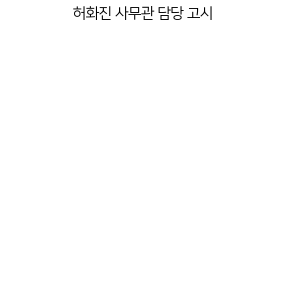

In [42]:
#for i in range(1):

for i in range(len(all_manager_gosi)):
    plt.clf()
    temp = all_manager_gosi.iloc[i]

    for j in temp.index :
        if(temp[j]==0) :
            del temp[j]
    
    
    
    plt.figure(figsize=(5,5),facecolor='white') ## 캔버스 생성
    plt.title(temp.name+' 담당 고시', fontsize=15)
    plt.rc('legend',fontsize=5)
    plt.pie(temp,labels=temp.index, autopct='%d%%')
    
    #plt.show()
    plt.savefig('./담당자별_고시/'+temp.name+'.png', dpi=300)


## 화학물질

In [ ]:

#gosi_df= pd.DataFrame(file["manager"])

f = open("./취급시설_고시_목록.txt", 'r', encoding='UTF8')    
lines = f.readlines()

for line in lines:
    
    line = line.strip()  # 줄 끝의 줄 바꿈 문자를 제거한다.
    
    if re.search('---',line) is not None :
        gosis = line.split('---')

        temp_df = pd.DataFrame(columns=[gosis[0]])


        for i in range(len(file)):

            content_Text = file.loc[i,"Column1.content"] #질문 추출
            prcs_cntn_Text = str(file.loc[i,'Column1.prcs_cntn']) #답변 추출
        
            prcs_cntn_Text = prcs_cntn_Text +' '+content_Text

            flag = 0


            if any(gosi in prcs_cntn_Text for gosi in gosis) :
                 flag = 1
                #해당 고시의 화학물질 늘리기


            temp_df = pd.concat([temp_df,pd.DataFrame({gosis[0]:[flag]})], ignore_index=True)



        gosi_df.loc[:,gosis[0]] = temp_df
    
gosi_df

In [ ]:
ㅁㅁ